In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#This function checks the validity of float,it is specifically used for the various float columns to check if the strings are
#valid floating point strings
def isFloat(s):
    if re.match("^\d+\.\d+$", s) is None:
        if re.match("^\d+",s) is None:
            return False
        else:
            return True
    return True

In [3]:
telecom_churn_data = pd.read_csv('telecom_churn_data.csv')

In [4]:
telecom_churn_data.shape

(99999, 226)

In [5]:
len(telecom_churn_data['mobile_number'].unique())

99999

The data set has 99999 rows and the number of unique mobile number is too 99999 hence each row corresponds to a unique mobile number

The next step to do would be identify the data of interest,the high value customers ,so for that lets look at total_rech_amt_6 and total_rech_amt_7

In [6]:
print(sum(telecom_churn_data['total_rech_amt_6'].isna()))
print(sum(telecom_churn_data['total_rech_amt_7'].isna()))
print(sum(telecom_churn_data['total_rech_num_7'].isna()))
print(sum(telecom_churn_data['total_rech_num_6'].isna()))

0
0
0
0


In [7]:
filter_amt_6 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_amt_6']))
filter_amt_7 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_amt_7']))
filter_rech_6 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_num_6']))
filter_rech_7 = list(filter(lambda x:isFloat(str(x)),telecom_churn_data['total_rech_num_7']))

In [8]:
#len(filter_amt_6.to_list())
print(len(filter_amt_6))
print(len(filter_amt_7))
print(len(filter_rech_6))
print(len(filter_rech_7))

99999
99999
99999
99999


None of the columns pertaining to recharge amounts of first 2 months and none of the columns pertaining to number of times recharged have values other than floating point and all of them have 99999 values in total with no nan values.Hence data quality is verified 

In [9]:
#telecom_churn_data['avg_recharge_amt'] = telecom_churn_data.apply(lambda row:((telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/(telecom_churn_data['total_rech_num_6']+telecom_churn_data['total_rech_num_7'])),axis =1)
telecom_churn_data['avg_recharge_amt'] = 0

In [10]:
zeros_data = telecom_churn_data[(telecom_churn_data['total_rech_num_6'] ==0) & (telecom_churn_data['total_rech_num_7'] ==0)]
zeros_data.shape

(185, 227)

In [11]:
print(sum(zeros_data['total_rech_amt_7']>0))
print(sum(zeros_data['total_rech_amt_6']>0))

0
0


In [12]:
#telecom_churn_data['avg_recharge_amt'] = telecom_churn_data.apply(lambda row:((telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/(telecom_churn_data['total_rech_num_6']+telecom_churn_data['total_rech_num_7'])),axis =1)
telecom_churn_data['avg_recharge_amt'] = (telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/(telecom_churn_data['total_rech_num_6']+telecom_churn_data['total_rech_num_7'])
telecom_churn_data.loc[telecom_churn_data['avg_recharge_amt'].isna(),['avg_recharge_amt'] ] =0

In [13]:
sum(telecom_churn_data['avg_recharge_amt'].isna())

0

In [14]:
telecom_churn_data['avg_recharge_amt'].head()
telecom_churn_data['avg_recharge_amt'].shape

(99999,)

In [15]:
np.percentile(list(telecom_churn_data['avg_recharge_amt']),70)

56.333333333333336

In [16]:
high_value_customers = telecom_churn_data[telecom_churn_data['avg_recharge_amt']>np.percentile(list(telecom_churn_data['avg_recharge_amt']),70)]

In [17]:
high_value_customers.shape

(29975, 227)

In [24]:
high_value_customers['churn'] = 0

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
high_value_customers.loc[((high_value_customers['total_ic_mou_9']==0)&(high_value_customers['total_og_mou_9']==0)&(high_value_customers['vol_2g_mb_9']==0)&(high_value_customers['vol_3g_mb_9']==0)),['churn']] = 1

In [28]:
sum(high_value_customers['churn'])

2607

In [29]:
high_value_customers.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_recharge_amt', 'churn'],
      dtype='object', length=228)

Drop off all the columns ending with _9 after identifying churners.

In [34]:
cols = list(filter( lambda x: ("_9" not in x) ,high_value_customers.columns))

In [36]:
churn_dataset = high_value_customers[cols]

In [38]:
churn_dataset.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,87.714286,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,237.000000,1
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,...,NaN,1.0,NaN,902,0.00,0.00,0.00,0.00,69.166667,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.00,76.000000,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.00,57.375000,0


In [39]:
churn_dataset.to_csv('churndataset.csv')

In [42]:
churn_dataset['circle_id'].unique()

array([109], dtype=int64)

We can eliminate certain columns like date of last recharge,last recharge of data ,last date ,mobile number.As seve on use on business value,afterall the amount of recharge matters.

In [45]:
churn_dataset = churn_dataset.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_6'],axis = 1)

In [48]:
churn_dataset = churn_dataset.drop(['mobile_number'],axis = 1)

In [49]:
len(churn_dataset.columns)

168

In [50]:
backup_data_frame = churn_dataset

In [126]:
churn_dataset = backup_data_frame

First lets consider attributes which could possibly be useful in determining churn.


In [131]:
#The columns with arpu can be dropped as the revenue could be in way determined by recharge amount,so lets drop the columns with arpu
newcols = list(filter(lambda x:('arpu' not in x), list(churn_dataset.columns)))
churn_dataset_filtered = churn_dataset[newcols]

In [132]:
churn_dataset_filtered = churn_dataset[newcols]

In [134]:
#print(newcols)
len(churn_dataset_filtered.columns)

159

In [135]:
#Lets consider the categories of attributes one by one.
#Firstly lets consider local calls
#1.local calls outgoing to other operator fixed line
sum(churn_dataset_filtered['loc_og_t2o_mou'].isna())

515

In [136]:
cf = churn_dataset_filtered[~churn_dataset_filtered['loc_og_t2o_mou'].isna()]
cf['loc_og_t2o_mou'].mean()

0.0

In [137]:
#Since all the values are zero in it,it does not serve any meaningful info for regression,so drop it.Since the number of 
#minutes cannot be negative,hence all non null values are zero
churn_dataset_filtered_1 = churn_dataset_filtered.drop(['loc_og_t2o_mou'],axis = 1)

In [138]:
cf = churn_dataset_filtered_1[~churn_dataset_filtered_1['std_og_t2o_mou'].isna()]
cf['std_og_t2o_mou'].mean()

0.0

In [139]:
#Since all the non null values are zero again it does not serve any meaningful infromation for regression.It can be dropped.Since the number of 
#minutes cannot be negative,hence all non null values are zero
churn_dataset_filtered_2 = churn_dataset_filtered_1.drop(['std_og_t2o_mou'],axis = 1)

In [140]:
#The same goes with loc_ic_t2o_mou as well
cf = churn_dataset_filtered_2[~churn_dataset_filtered_2['loc_ic_t2o_mou'].isna()]
cf['loc_ic_t2o_mou'].mean()

0.0

So far we have just dropped certain columns,now it is ideal to split the data into train and test,before imputing the values or checking the distributions as test data should ideally be unseen. 

In [142]:
churn_dataset_filtered_train,churn_dataset_filtered_test=train_test_split(churn_dataset_filtered_3,train_size=0.7,test_size=0.3,random_state=100)

In [143]:
#The same goes with loc_ic_t2o_mou as well
cf = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna()]
print(cf.shape)
#cf['loc_ic_t2o_mou'].mean()

(320, 157)


In [144]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna()]
cf['loc_og_t2t_mou_6'].mean()

81.98038321347533

{'whiskers': [<matplotlib.lines.Line2D at 0xc131ece4c8>,
 'caps': [<matplotlib.lines.Line2D at 0xc131ecef48>,
 'boxes': [<matplotlib.lines.Line2D at 0xc131ee10c8>],
 'medians': [<matplotlib.lines.Line2D at 0xc131ec6ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0xc131ec6f88>],
 'means': []}

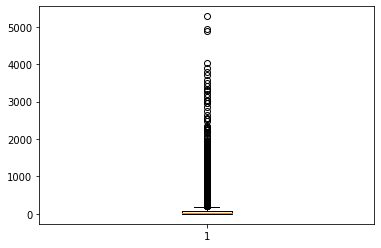

In [145]:
plt.boxplot(cf['loc_og_t2t_mou_6'])

In [146]:
#There is of course skewness in the data.However lets check the distribution of churn and not churn in this dataset.
#cf.groupby('churn')['onnet_mou_6'].count()
print(cf.shape)
sum(cf['churn'])
#1523 have churned

(20302, 157)


1523

15.09

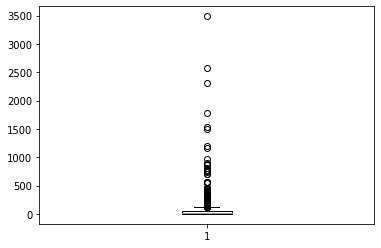

In [147]:
churned_nonna_loc_og_t2t_mou_6 = cf[cf['churn'] ==1]
plt.boxplot(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])
np.median(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])

30.79

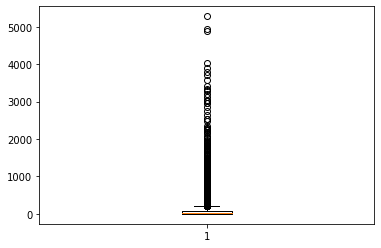

In [148]:
churned_nonna_loc_og_t2t_mou_6 = cf[cf['churn'] ==0]
plt.boxplot(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])
np.median(churned_nonna_loc_og_t2t_mou_6['loc_og_t2t_mou_6'])

In [150]:
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna()]
#print(cf2.groupby('churn')['onnet_mou_6'].count())
print(cf2.shape)
sum(cf2['churn'])
#Here 320 have churned which is considerable quite large when the dataset is imbalanced ,we must consider
#imputing these values.

(320, 157)


85

In [151]:
#impute the values of na's with their respective medians of groups of churned and unchurned
#churn_dataset_filtered_train

churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna())),['loc_og_t2t_mou_6']] =15.09
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train['loc_og_t2t_mou_6'].isna())),['loc_og_t2t_mou_6']] =30.79



C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
#The outlier treatment ,since the dataset is small lets take 1.5 % of extreme values

In [164]:
cf = churn_dataset_filtered_train['loc_og_t2t_mou_6']
#cf =churn_dataset_filtered_train[(churn_dataset_filtered_train['churn'] ==1),['loc_og_t2t_mou_6']]
print(np.percentile(list(cf),98.5))
print(np.percentile(list(cf),1.5))

667.4710500000017
0.0


In [165]:
churn_dataset_filtered_train.shape
churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_6']<np.percentile(list(cf),98.5)]
churn_dataset_filtered_train.shape
#Here zero is not considered as zero extends across large range of percentiles so it cannot be considered as outlier

(20312, 157)

1590

In [167]:
cf = churn_dataset_filtered_train[~churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna()]
cf['loc_og_t2t_mou_7'].mean()

65.94684807029773

8.23

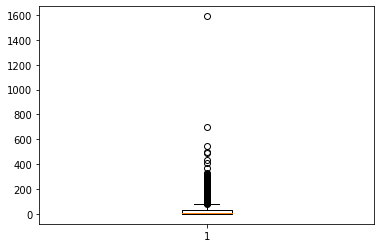

In [173]:
notna_churn_loc_og_t2t_mou_7 = cf[(cf['churn']==1)]

plt.boxplot(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])
np.median(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])

29.96

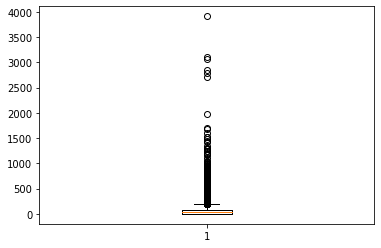

In [174]:
notna_churn_loc_og_t2t_mou_7 = cf[(cf['churn']==0)]

plt.boxplot(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])
np.median(notna_churn_loc_og_t2t_mou_7['loc_og_t2t_mou_7'])

In [177]:
#Print the count churns and non churns when there are nas
cf2 = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna()]
print(cf2.shape)
print(cf2[cf2['churn']==1].shape)
print(cf2[cf2['churn']==0].shape)

(283, 157)
(141, 157)
(142, 157)


In [178]:
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==1) &(churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna())),['loc_og_t2t_mou_7']] =8.23
churn_dataset_filtered_train.loc[((churn_dataset_filtered_train['churn'] ==0 )&(churn_dataset_filtered_train['loc_og_t2t_mou_7'].isna())),['loc_og_t2t_mou_7']] =29.96



C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [179]:
#The same approach goes with outlier treatment too
cf = churn_dataset_filtered_train['loc_og_t2t_mou_7']
#cf =churn_dataset_filtered_train[(churn_dataset_filtered_train['churn'] ==1),['loc_og_t2t_mou_6']]
print(np.percentile(list(cf),98.5))
print(np.percentile(list(cf),1.5))

444.99674999999996
0.0


In [180]:
churn_dataset_filtered_train = churn_dataset_filtered_train[churn_dataset_filtered_train['loc_og_t2t_mou_7']<np.percentile(list(cf),98.5)]
churn_dataset_filtered_train.shape

(20007, 157)